In [2]:
import numpy as np

β = 0.95
c=1

θ_num = 11
θ_vec = np.linspace(0,10,θ_num)
θ_pdf = np.ones(θ_num)/θ_num

ϵ_num = 6
ϵ_vec = np.linspace(0,5,ϵ_num)
ϵ_pdf = np.ones(ϵ_num)/ϵ_num

θ_mat = np.reshape(θ_vec,(θ_num,1))@np.ones((1,ϵ_num))
ϵ_mat = np.ones((θ_num,1))@np.reshape(ϵ_vec,(1,ϵ_num))
θϵ_pdf = np.ones((θ_num,ϵ_num))/(θ_num*ϵ_num)

v_old = np.ones((θ_num,ϵ_num))
v_new = np.zeros((θ_num,ϵ_num))
v_tol = 1e-5
v_ctr = 0
policy = np.zeros((θ_num,ϵ_num),int)
 
while np.max(np.abs(v_old-v_new)) > v_tol:
    v_old = np.copy(v_new) 
    for θ_curr in range(θ_num):
        for ϵ_curr in range(ϵ_num):
            stay_put = (θ_vec[θ_curr]+ϵ_vec[ϵ_curr])/(1-β)
            new_job = c+np.sum((β*v_old[θ_curr,:])*ϵ_pdf)
            new_life = c+np.sum((β*v_old)*θϵ_pdf)
            v_new[θ_curr,ϵ_curr] = np.max([stay_put,new_job,new_life])
            policy[θ_curr,ϵ_curr] = np.argmax([stay_put,new_job,new_life])
    v_ctr = v_ctr+1

print(v_ctr)
            

37


<IPython.core.display.Javascript object>


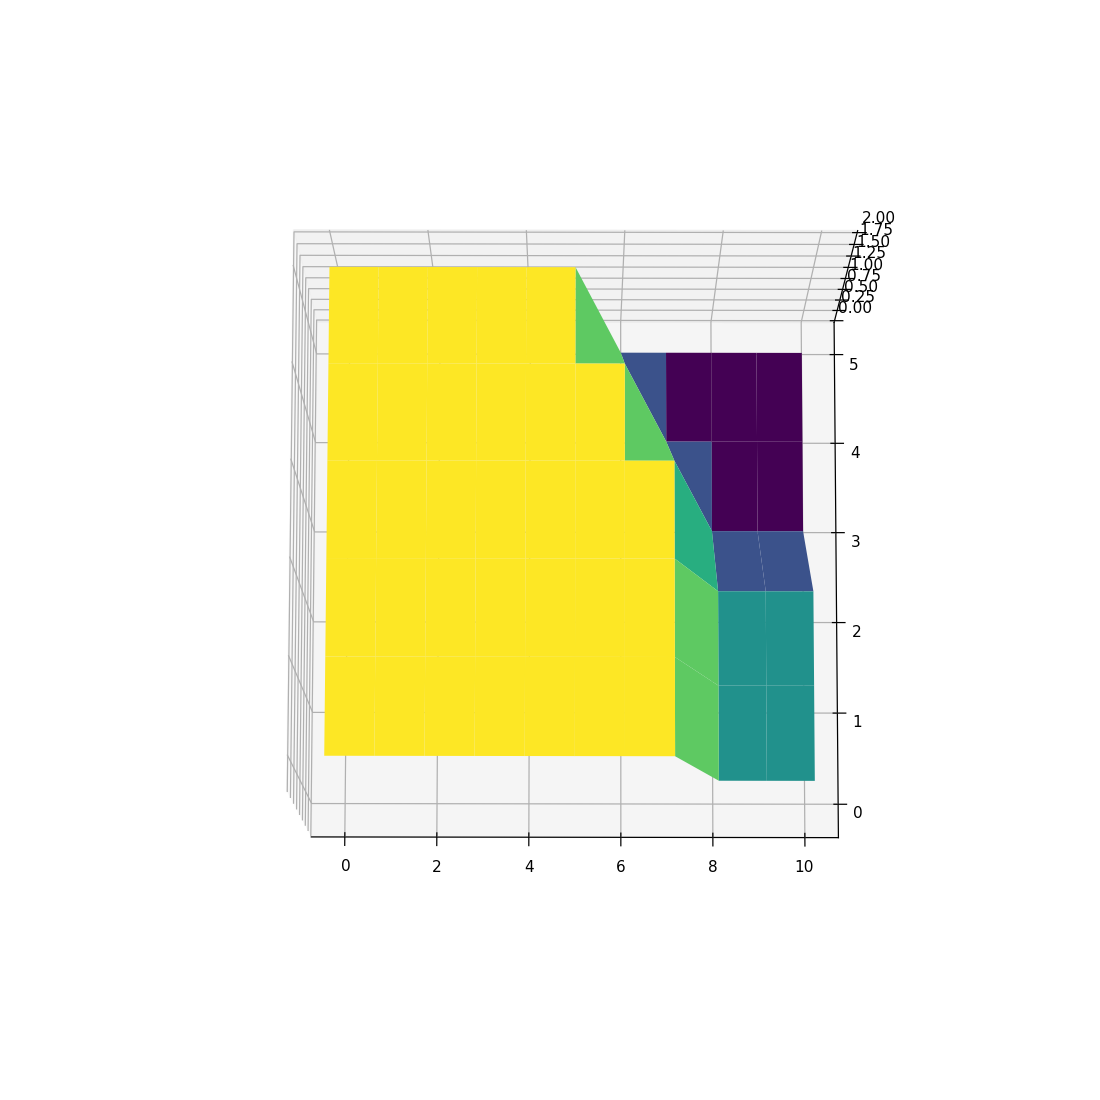

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(θ_mat,ϵ_mat,policy,cmap='viridis')